# 20244252_류태양(20241126, 20241128)
- 14장 기계학습으로 똑똑환 컴퓨터를 만들자
- 류태양
- 20244252

## 오늘 배운 내용
1. 회귀문제를 만들고 1에 가까우면 좋은 모델이라는 것을 알게되었습니다.
2. 학습 데이터를 가지고 테스트 데이터를 비교하는 것을 배웠습니다.

## 어려운 점들
1. 학습을 과하게 해서도 적게 해서도 오류가 나면 어느 정도를 해야 적당한지 모르겠습니다.
2. 테스트용 데이터로 선형 함수를 얼마나 따르는지 확인할 때 각 컴퓨터마다 결과값이 달라 오류인지 아닌지 확인이 힘들었습니다.

In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [17]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [21]:
x = diabetes['data']
x.shape

(442, 10)

In [19]:
y = diabetes['target'].reshape(-1, 1)
y.shape

(442, 1)

In [31]:
import numpy as np
import pandas as pd

data = np.concatenate([x, y], axis = -1)
data.shape

(442, 11)

In [32]:
columns = diabetes['feature_names']+['y']

data_df = pd.DataFrame(data, columns=columns)
data_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<AxesSubplot:xlabel='bmi', ylabel='y'>

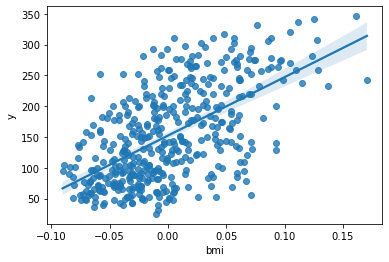

In [38]:
import seaborn as sns

sns.regplot(data= data_df, x='bmi', y='y')

<AxesSubplot:>

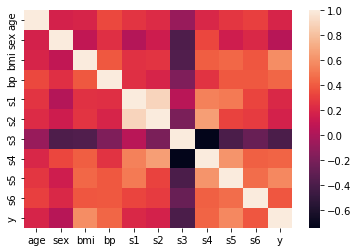

In [36]:
correlation = data_df.corr()
sns.heatmap(correlation)

In [41]:
x = data_df['bmi'].values.reshape(-1, 1)
x.shape

(442, 1)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [56]:
a, b = model.coef_, model.intercept_
x_hat = np.linspace(-0.1, 0.15, 100)
y_hat = a.flatten() * x_hat + b

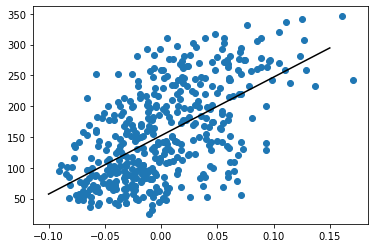

In [57]:
import matplotlib.pyplot as plt

plt.scatter(x.flatten(), y.flatten())
plt.plot(x_hat, y_hat, 'k-')
plt.show()

In [62]:
model.score(x, y)

0.5177494254132934

In [63]:
x = diabetes['data']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [61]:
model.coef_

array([[ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
        -792.18416163,  476.74583782,  101.04457032,  177.06417623,
         751.27932109,   67.62538639]])

<function matplotlib.pyplot.show(close=None, block=None)>

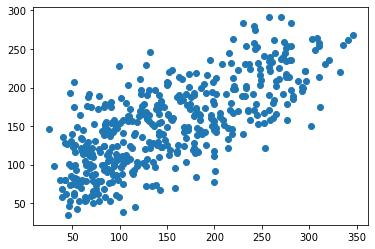

In [66]:
y_hat = model.predict(x)
plt.scatter(y, y_hat)
plt.show

In [67]:
model.score(x, y)

0.5177494254132934

In [3]:
#classification
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris['data'].shape

(150, 4)

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
x = iris['data']
y = iris['target']

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled.max(), x_scaled.min()

(1.0, 0.0)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, shuffle=True, test_size=0.2)
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [34]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []
for n in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_train)
    train_acc.append((y_hat == y_train).sum() / len(y_train))
    y_hat = model.predict(x_test)
    test_acc.append((y_hat == y_test).sum() / len(y_test))

train_acc, test_acc

([1.0,
  0.9833333333333333,
  0.9666666666666667,
  0.9666666666666667,
  0.9666666666666667,
  0.975,
  0.9833333333333333,
  0.975,
  0.975,
  0.975],
 [0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333])

In [21]:
y_hat = model.predict(x_train)
(y_hat == y_train).sum() / len(y_train)

0.975

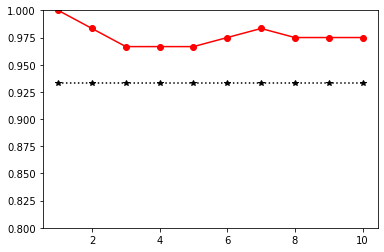

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), train_acc, 'ro-')
plt.plot(range(1,11), test_acc, 'k*:')
plt.ylim([0.8, 1])
plt.show()

## 요점정리
### 1) 기계학습의 대표적인 기법은 세가지 있다. 각 특징을 알아보자.
- 지도학습(supervised learning) 
    문제와 답을 주어서 규칙을 학습한다. 
- 비지도 학습(unsupervbised learning)
    문제만 주고 비슷한 패턴을 학습한다. 
- 강화학습(reinforcement learning)
    알고리즘을 행동에 따라 평가를 하여 보상을 주는 학습이다. 
    
### 2) 지도 학습에는 두가지 종류가 있다. 각 특징을 설명하라.
- 회귀(regression)
    연속적인 값을 예측하여 점점 오차를 줄인다.
- 분류(classification)
    객체를 어떤 카테고리 중의 하나로 예측한다. 예측을 정하는 방법으로는 가장 근처이나 비슷한 특징을 고른다.
    
### 3) 데이터를 학습 데이터와 검증 데이터로 나누는 이유는 무엇인가?
- 검증 데이터는 학습 데이터를 바탕으로 나온 것이라서 이미 좋은 결과를 가져올 것이다. 그런데 더 많은 오차를 고쳐야 하는데 이미 좋은 결과가 나오는 것은 할 필요가 없다. 만약 해야한다면 처음 본 새로운 데이터로 학습해야한다.
- 학습 데이터에서 나온 검증 데이터는 비슷하니 이미 알고있는 결과라서 학습이 되지않아 새로운 데이터로 학습해야한다.

### 4) 과소 적합(undefitting), 과대적합(overfitting)이란 무엇인가?
- 과소 적합
    너무 단순하여 학습 데이터에서도 새로운 데이터에서도 잘 설명하지 못한다.
    이유 : 학습을 대충하여 데이터에 대해 예측을 이해하지 못했기 때문이다.
- 과대 적합
    학습 데이터에서는 성능이 뛰어나지만, 새로운 데이터에서는 성능이 나오지 않는 모델이다.
    이유 : 학습을 너무 많이 하여 모델이 복잡하게 되었기 때문이다.

## 주관식 문제
1. 기계학습(machine learning)
2. 지도 학습, 비지도 학습, 강화학습 
3. 회귀, 분류
4. 사이킷런(scikit-learn)
5. LinearRegression()
6. fit()
7. predict()
8. 경사하강법(gradient descent), 비용(cost)
9. newaxis
10. train_test_split()
11. score()

In [39]:
import numpy as np
x = np.arange(5)
x[:, None, None]

array([[[0]],

       [[1]],

       [[2]],

       [[3]],

       [[4]]])

## 심화문제

### 14.1

In [41]:
import pandas as pd
model = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
hp = [130, 250, 190, 300, 210, 220, 170]
mileage = [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]

data = pd.DataFrame({'hp' : hp, 'mile' : mileage})
data.index = model
data

,hp,mile
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


In [42]:
data.corr()

,hp,mile
hp,1.000000,-0.933098
mile,-0.933098,1.000000


<AxesSubplot:xlabel='hp', ylabel='mile'>

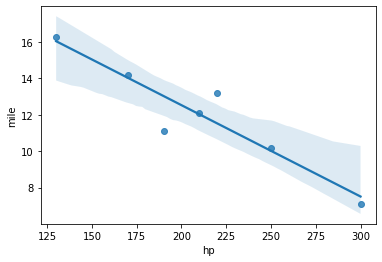

In [44]:
import seaborn as sns

sns.regplot(data = data, x = 'hp', y = 'mile')

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(hp)[:, None]
y = np.array(mileage).reshape(-1, 1)
print(x.shape, y.shape)
model = LinearRegression()

model.fit(x,y)
model.score(x, y)

(7, 1) (7, 1)


0.8706727649378525

In [51]:
model.coef_, model.intercept_

(array([[-0.05027473]]), array([22.58626374]))

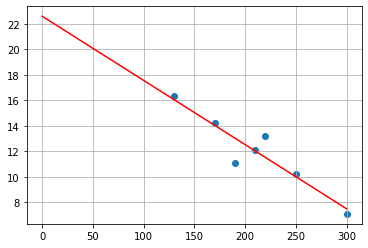

In [58]:
import matplotlib.pyplot as plt
x_hat = np.linspace(0, 300, 300)[:, None]
y_hat = model.predict(x_hat)

plt.scatter(hp, mileage)
plt.plot(x_hat.flatten(), y_hat,'r-')
plt.grid()
plt.show()

In [63]:
model.coef_[0] * 270 + model.intercept_

array([9.01208791])

In [64]:
model.predict([[270]])

array([[9.01208791]])

### 14.2

In [ ]:
model = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
hp = [130, 250, 190, 300, 210, 220, 170]
weight = [1900, 2600, 2200, 2900, 2400, 2300, 2100]
mileage = [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]

### 14.3

In [62]:
dacl = [77, 78, 85, 83, 73, 77, 73, 80]
dact = [25, 28, 19, 30, 21, 22, 17, 35]
saml = [75, 77, 86, 86, 79, 83, 83, 88]
samt = [56, 57, 50, 53, 60, 53, 49, 61]
mall = [34, 38, 38, 41, 30, 37, 41, 35]
malt = [22, 25, 19, 30, 21, 24, 28, 18]